Дурыманов Евгений Валерьевич, отчет по алгоритмам НА, НГ, И-НГИ(Г) (два способа пересчет характеристик).

In [1]:
import bisect
import sys
from test_functions import test_functions
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
rec = 100000
sys.setrecursionlimit(rec)

In [2]:
def F(func, dots, L, x):
    f_s = [func(i) - L * np.abs(x - i) for (i, _) in dots]
    return max(f_s)

In [3]:
def F_H(func, dots, L, x):
    f_s = [func(i) - L * np.abs(x - i) for (i, _, _) in dots]
    return max(f_s)

In [74]:
def F_H_tild(func, dots, L, x):
    L_tilds = []
    for i, dot in enumerate(dots[:-1]):
        L_tilds.append((L + (1 / L) * ((func(dots[i + 1][0]) -
                                            func(dots[i][0])) / (
                                                       dots[i + 1][0] - dots[i][0])) ** 2) / 2)
    f_s = [func(i) - L_tilds[index] * np.abs(x - i) for index, (i, _, _) in enumerate(dots[:-1])]
    f_s.append(func(dots[-1][0]) - L_tilds[-1] * np.abs(x - dots[-1][0]))
    return max(f_s)


In [68]:
def na(func, dots, L, counter):
    min_value, min_index = min([(y, i) for i, (x, y) in enumerate(dots)])

    if abs(dots[min_index][0] - dots[min_index + 1][0]) < epsilon:
        func_values = [func(x) for (x, y) in dots]
        return min(func_values), counter
    counter += 1
    new_dot = (dots[min_index][0] + dots[min_index + 1][0]) / 2 - (func(dots[min_index + 1][0]) - \
                                                                   func(dots[min_index][0])) / (2 * L)
    new_index = bisect.bisect_left(dots, (new_dot, 0))
    bisect.insort_left(dots, (new_dot, 0))
    new_char_1 = (func(dots[new_index][0]) + func(dots[new_index - 1][0])) / 2 - \
               L * (dots[new_index][0] - dots[new_index - 1][0]) / 2
    new_char_2 = (func(dots[new_index][0]) + func(dots[new_index + 1][0])) / 2 - \
                 L * (dots[new_index + 1][0] - dots[new_index][0]) / 2
    dots[new_index - 1] = (dots[new_index - 1][0], new_char_1)
    dots[new_index] = (new_dot, new_char_2)
    return na(func, dots, L, counter)



In [69]:
def ng(func, dots, counter, H_max_index, tau):
    min_value, min_index = min([(y, i) for i, (x, y, h) in enumerate(dots)])
    H_start = dots[H_max_index][2]
    if abs(dots[min_index][0] - dots[min_index + 1][0]) < epsilon:
        func_values = [func(x) for (x, y, h) in dots]
        return min(func_values), counter, dots[H_max_index][2]
    L = 1 if dots[H_max_index][2] == 0 else tau * dots[H_max_index][2]
    counter += 1
    new_dot = ((dots[min_index][0] + dots[min_index + 1][0]) / 2) - ((func(dots[min_index + 1][0]) -
                                                                   func(dots[min_index][0])) / (2 * L))
    new_index = bisect.bisect_left(dots, (new_dot, 0, 0))
    bisect.insort_left(dots, (new_dot, 0, 0))
    H_1 = abs(func(dots[new_index][0]) - func(dots[new_index - 1][0])) / (dots[new_index][0] - dots[new_index - 1][0])
    H_2 = abs(func(dots[new_index + 1][0]) - func(dots[new_index][0])) / (dots[new_index + 1][0] - dots[new_index][0])

    dots[new_index - 1] = (dots[new_index - 1][0], 0, H_1)
    dots[new_index] = (new_dot, 0, H_2)
    max_value, H_max_index = max([(h, -i) for i, (x, y, h) in enumerate(dots)])
    H_max_index *= (-1)
    H_finish = dots[H_max_index][2]
    L = 1 if dots[H_max_index][2] == 0 else tau * dots[H_max_index][2]
    if H_start == H_finish:
        new_char_1 = (func(dots[new_index][0]) + func(dots[new_index - 1][0])) / 2 - \
                     L * (dots[new_index][0] - dots[new_index - 1][0]) / 2
        new_char_2 = (func(dots[new_index][0]) + func(dots[new_index + 1][0])) / 2 - \
                     L * (dots[new_index + 1][0] - dots[new_index][0]) / 2
        dots[new_index - 1] = (dots[new_index - 1][0], new_char_1, H_1)
        dots[new_index] = (dots[new_index][0], new_char_2, H_2)
    else:
        for i in range(len(dots) - 1):
            new_char = (func(dots[i + 1][0]) + func(dots[i][0])) / 2 - \
                     L * (dots[i + 1][0] - dots[i][0]) / 2
            dots[i] = (dots[i][0], new_char, dots[i][2])
    return ng(func, dots, counter, H_max_index, tau)

In [70]:
def i_ng_1(func, dots, counter, H_max_index, tau):
    max_value, max_index = max([(y, -i) for i, (x, y, h) in enumerate(dots)])
    max_index *= -1
    H_start = dots[H_max_index][2]
    if abs(dots[max_index][0] - dots[max_index + 1][0]) < epsilon:
        func_values = [func(x) for (x, _, _) in dots]
        return min(func_values), counter, dots[H_max_index][2]
    L = 1 if dots[H_max_index][2] == 0 else tau * dots[H_max_index][2]
    counter += 1
    new_dot = (dots[max_index][0] + dots[max_index + 1][0]) / 2 - \
              (func(dots[max_index + 1][0]) - func(dots[max_index][0])) / (2 * L)
    new_index = bisect.bisect_left(dots, (new_dot, 0, 0))
    bisect.insort_left(dots, (new_dot, 0, 0))
    H_1 = abs(func(dots[new_index][0]) - func(dots[new_index - 1][0])) / (dots[new_index][0] - dots[new_index - 1][0])
    H_2 = abs(func(dots[new_index + 1][0]) - func(dots[new_index][0])) / (dots[new_index + 1][0] - dots[new_index][0])
    dots[new_index - 1] = (dots[new_index - 1][0], 0, H_1)
    dots[new_index] = (new_dot, 0, H_2)
    max_value, H_max_index = max([(h, -i) for i, (x, y, h) in enumerate(dots)])
    H_max_index = H_max_index * (-1)
    L = 1 if dots[H_max_index][2] == 0 else tau * dots[H_max_index][2]
    H_finish = dots[H_max_index][2]
    if H_start == H_finish:
        new_char_1 = L * (dots[new_index][0] - dots[new_index - 1][0]) + ((func(dots[new_index][0]) - func(dots[new_index - 1][0])) ** 2) / (L * (dots[new_index][0] - dots[new_index - 1][0])) - 2 * (func(dots[new_index][0]) + func(dots[new_index - 1][0]))
        new_char_2 = L * (dots[new_index + 1][0] - dots[new_index][0]) + ((func(dots[new_index + 1][0]) - func(dots[new_index][0])) ** 2) / (L * (dots[new_index + 1][0] - dots[new_index][0])) - 2 * (func(dots[new_index + 1][0]) + func(dots[new_index][0]))
        dots[new_index - 1] = (dots[new_index - 1][0], new_char_1, H_1)
        dots[new_index] = (new_dot, new_char_2, H_2)
    else:
        for i in range(len(dots) - 1):
            new_char = L * (dots[i + 1][0] - dots[i][0]) + ((
                        (func(dots[i + 1][0]) - func(dots[i][0])) ** 2) / (
                                     L * (dots[i + 1][0] - dots[i][0]))) - 2 * (
                                     func(dots[i + 1][0]) + func(dots[i][0]))
            dots[i] = (dots[i][0], new_char, dots[i][2])

    return i_ng_1(func, dots, counter, H_max_index, tau)


In [71]:
def i_ng_2(func, dots, counter, H_max_index, tau):
    max_value, max_index = max([(y, -i) for i, (x, y, h) in enumerate(dots)])
    max_index *= -1
    H_start = dots[H_max_index][2]
    if abs(dots[max_index][0] - dots[max_index + 1][0]) < epsilon:
        func_values = [func(x) for (x, _, _) in dots]
        return min(func_values), counter, dots[H_max_index][2]
    L = 1 if dots[H_max_index][2] == 0 else tau * dots[H_max_index][2]
    counter += 1
    new_dot = (dots[max_index][0] + dots[max_index + 1][0]) / 2 - \
              (func(dots[max_index + 1][0]) - func(dots[max_index][0])) / (2 * L)
    new_index = bisect.bisect_left(dots, (new_dot, 0, 0))
    bisect.insort_left(dots, (new_dot, 0, 0))
    H_1 = abs(func(dots[new_index][0]) - func(dots[new_index - 1][0])) / (dots[new_index][0] - dots[new_index - 1][0])
    H_2 = abs(func(dots[new_index + 1][0]) - func(dots[new_index][0])) / (dots[new_index + 1][0] - dots[new_index][0])
    dots[new_index - 1] = (dots[new_index - 1][0], 0, H_1)
    dots[new_index] = (new_dot, 0, H_2)
    max_value, H_max_index = max([(h, -i) for i, (x, y, h) in enumerate(dots)])
    H_max_index = H_max_index * (-1)
    L = 1 if dots[H_max_index][2] == 0 else tau * dots[H_max_index][2]
    H_finish = dots[H_max_index][2]
    if H_start == H_finish:
        L_tild_1 = (L + (1 / L) * ((func(dots[new_index][0]) -
                                       func(dots[new_index - 1][0])) / (dots[new_index][0] - dots[new_index - 1][0])) ** 2) / 2
        R_1 = -4 * ((func(dots[new_index][0]) + func(dots[new_index - 1][0]) / 2) - L_tild_1 * ((dots[new_index][0] - dots[new_index - 1][0]) / 2))
        L_tild_2 = (L + (1 / L) * ((func(dots[new_index + 1][0]) -
                                    func(dots[new_index][0])) / (
                                               dots[new_index + 1][0] - dots[new_index][0])) ** 2) / 2
        R_2 = -4 * ((func(dots[new_index + 1][0]) + func(dots[new_index][0]) / 2) - L_tild_2 * (
                    (dots[new_index + 1][0] - dots[new_index][0]) / 2))
        dots[new_index - 1] = (dots[new_index - 1][0], R_1, H_1)
        dots[new_index] = (new_dot, R_2, H_2)
    else:
        for i in range(len(dots) - 1):
            L_tild = (L + (1 / L) * ((func(dots[i + 1][0]) -
                                        func(dots[i][0])) / (
                                                   dots[i + 1][0] - dots[i][0])) ** 2) / 2
            R = -4 * ((func(dots[i + 1][0]) + func(dots[i][0]) / 2) - L_tild * (
                    (dots[i + 1][0] - dots[i][0]) / 2))
            dots[i] = (dots[i][0], R, dots[i][2])

    return i_ng_2(func, dots, counter, H_max_index, tau)

In [72]:
xarrays, yarrays, ogarrays = [], [], []
for index, func in enumerate(test_functions):
    x_arr = np.linspace(func.interval[0], func.interval[1], 1200)
    y = []
    og = []
    a, b, L, counter = func.interval[0], func.interval[1], func.L, 0
    epsilon = (b - a) * (10 ** -4)
    char_a = (func.f(a) + func.f(b)) / 2 - L * (b - a) / 2
    dots = [(a, char_a), (b, float("inf"))]
    minval, count = na(func.f, dots, L, counter)
    print(index + 1, "," ,minval, "," ,count)
    for i in x_arr:
        y.append(func.f(i))
        og.append(F(func.f, dots, L, i))
    xarrays.append(x_arr)
    yarrays.append(y)
    ogarrays.append(og)

1 , -29763.232094272586 , 147
2 , -1.8995993274645637 , 153
3 , -12.031249116287526 , 193
4 , -3.8504507047313044 , 409
5 , -1.489072298110759 , 147
6 , -0.8242390939268465 , 116
7 , -1.6013073762408405 , 135
8 , -14.50800073788127 , 185
9 , -1.905960845717455 , 121
10 , -7.916727170634592 , 147
11 , -1.4999999642618467 , 373
12 , -0.9999999905778292 , 299
13 , -1.5874010517067385 , 987
14 , -0.7886853468617426 , 141
15 , -0.03553390285664615 , 619
16 , 7.515924190091363 , 995
17 , 7.000000023303727 , 547
18 , 2.1023376637222056e-08 , 301
19 , -7.815674490358712 , 129
20 , -0.06349051318088947 , 75


1. НА - алгоритм, в таблице выше форматом "Номер тестовой функции", "Посчитанный минимум", "Количество итераций работы алгоритма".

2. Снизу отображены графики функции и огибающих ломаных:

- параметр остановки алгоритма: $x_t$ - $x_{t-1}$ < $(b - a) \times $$10^{-4}$, где b, a - граничные точки области определения функции, $x_t$ - точка испытания функции на следующем шаге алгоритма, $x_{t-1}$ - точка испытания ближайшая слева на оси абсцисс

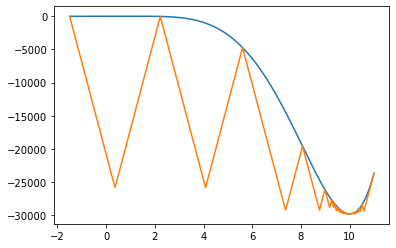

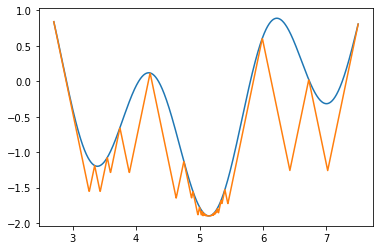

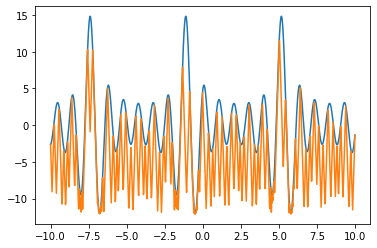

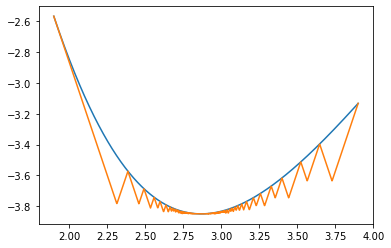

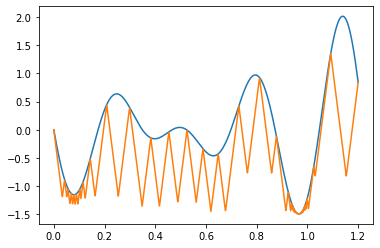

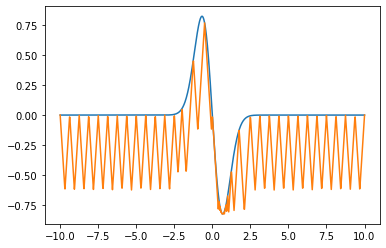

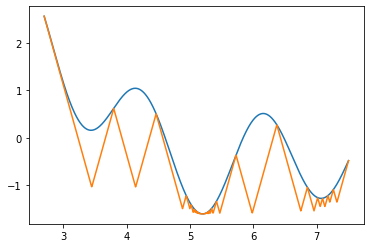

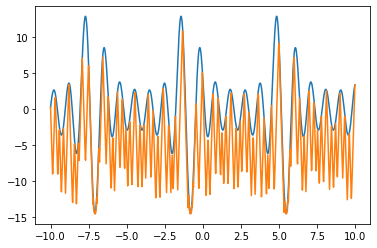

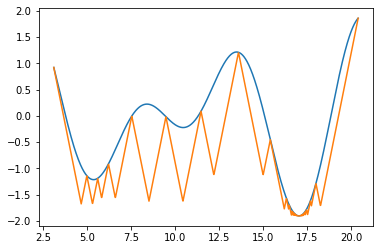

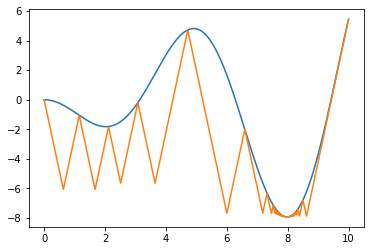

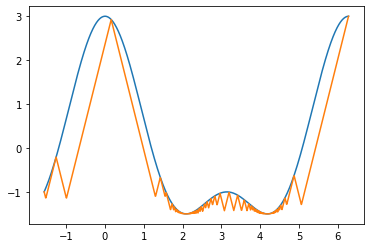

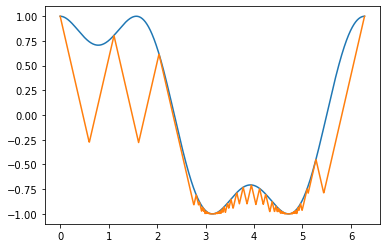

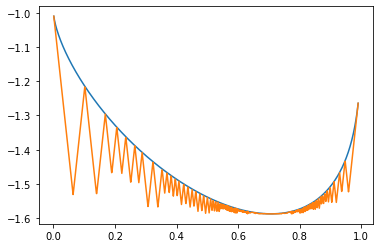

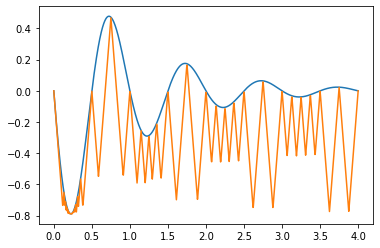

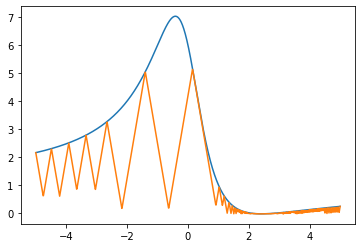

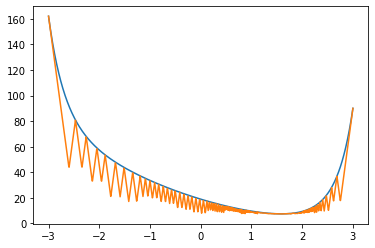

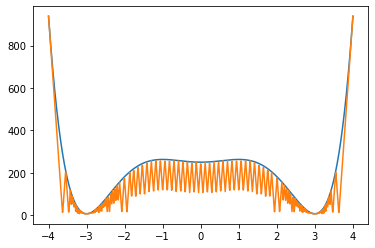

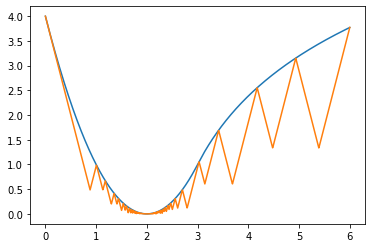

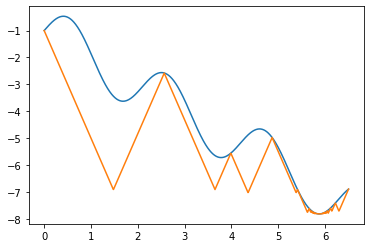

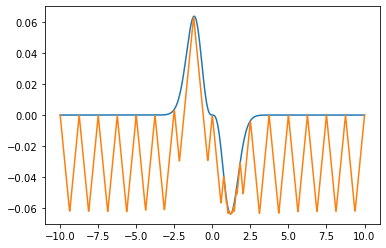

In [27]:
 for index in range(20):
    plt.plot(xarrays[index], yarrays[index])
    plt.plot(xarrays[index], ogarrays[index])
    plt.show()

In [52]:
xarrays, yarrays, ogarrays = [], [], []


for index, func in enumerate(test_functions):
    x_arr = np.linspace(func.interval[0], func.interval[1], 1200)
    y, og = [], []
    tau = 2
    a, b, counter = func.interval[0], func.interval[1], 0
    H = abs(func.f(b) - func.f(a)) / (b - a)
    L = 1 if H == 0 else tau * H
    epsilon = (b - a) * (10 ** -4)
    char_a = (func.f(a) + func.f(b)) / 2 - L * (b - a) / 2
    dots = [(a, char_a, H), (b, float("inf"), -float("inf"))]
    minval, count, H = ng(func.f, dots, counter, 0, tau)
    print(index + 1, minval, count)
    for i in x_arr:
        y.append(func.f(i))
        og.append(F_H(func.f, dots, H * tau, i))
    xarrays.append(x_arr)
    yarrays.append(y)
    ogarrays.append(og)

1 -29763.23266201622 225
2 -1.8995992055342268 189
3 -12.031248206784934 369
4 -3.8504507087585074 589
5 -1.4890725129802986 196
6 -0.8242393931808824 179
7 -1.6013075416905345 205
8 -14.508003252162379 297
9 -1.9059611177996763 207
10 -7.916727364269477 240
11 -1.4999999947037137 581
12 -0.9999999960011127 428
13 -1.5874010510180905 856
14 -0.7886852726568447 199
15 -0.03553388442937857 682
16 7.515924153407505 930
17 7.000001129291377 709
18 3.887700429722628e-08 362
19 -7.815674416741128 175
20 -0.06349052449395122 135


1. НГ - алгоритм, в таблице выше форматом "Номер тестовой функции", "Посчитанный минимум", "Количество итераций работы алгоритма".

2. Снизу отображены графики функции и огибающих ломаных:

- параметр остановки алгоритма: $x_t$ - $x_{t-1}$ < $(b - a) \times $$10^{-4}$, где b, a - граничные точки области определения функции, $x_t$ - точка испытания функции на следующем шаге алгоритма, $x_{t-1}$ - точка испытания ближайшая слева на оси абсцисс
- Параметр безопасности $\tau$ = 2

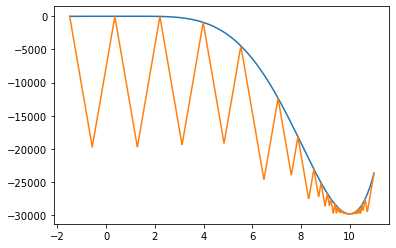

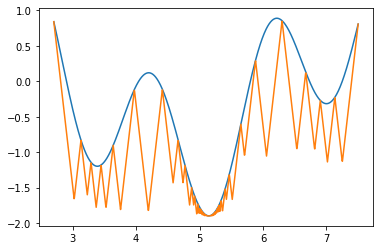

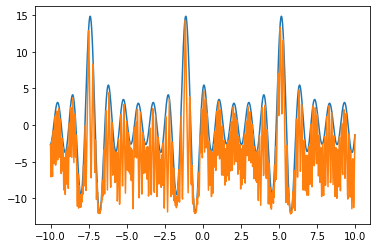

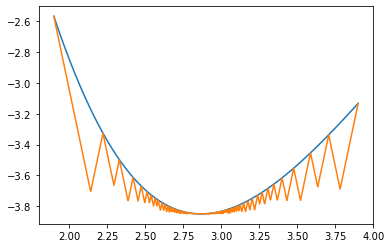

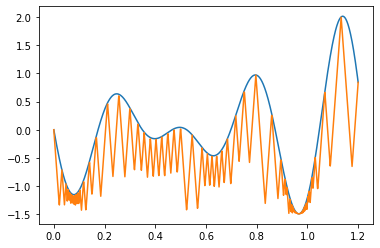

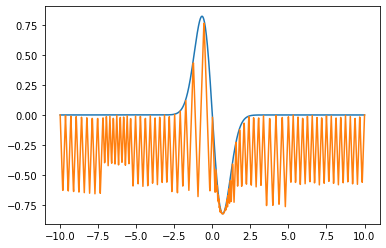

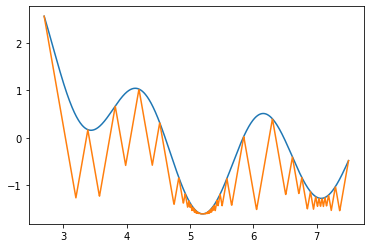

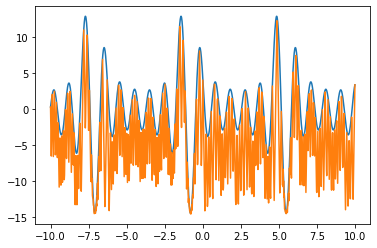

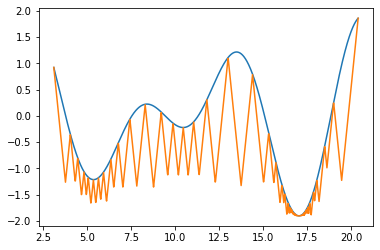

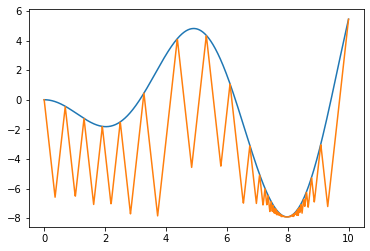

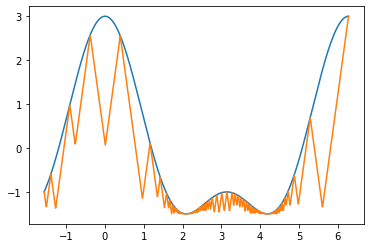

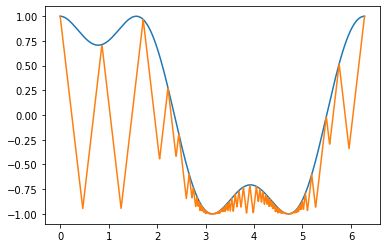

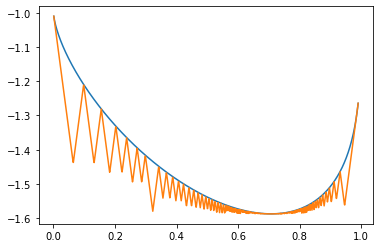

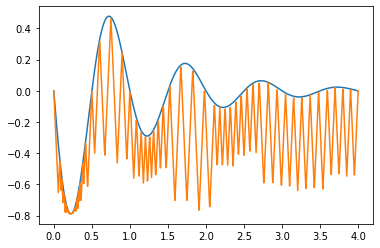

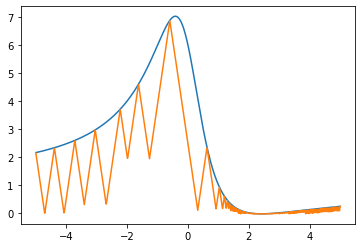

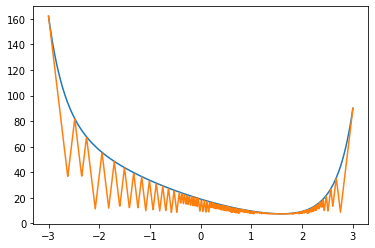

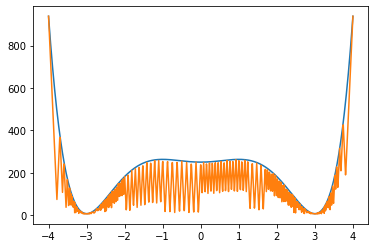

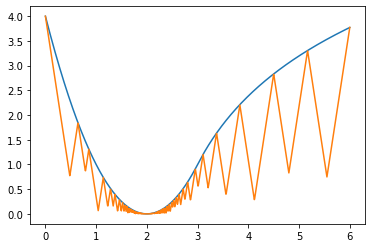

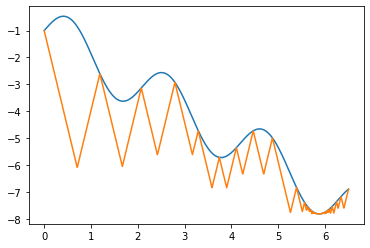

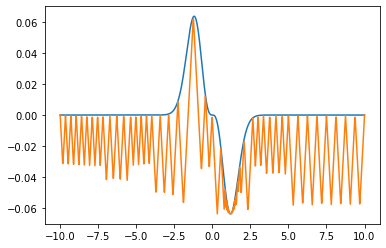

In [45]:
 for index in range(20):
    plt.plot(xarrays[index], yarrays[index])
    plt.plot(xarrays[index], ogarrays[index])
    plt.show()

In [77]:
xarrays, yarrays, ogarrays = [], [], []
for index, func in enumerate(test_functions):
    x_arr = np.linspace(func.interval[0], func.interval[1], 1200)
    y, og = [], []
    tau = 2
    a, b, counter = func.interval[0], func.interval[1], 0
    H = abs(func.f(b) - func.f(a)) / (b - a)
    L = 1 if H == 0 else tau * H
    epsilon = (b - a) * (10 ** -4)
    char_a = (L * (b - a)) + ((func.f(b) - func.f(a)) ** 2) / (L * (b - a)) - 2 * (func.f(b) + func.f(a))
    dots = [(a, char_a, H), (b, -float("inf"), -float("inf"))]
    maxval, count, H = i_ng_1(func.f, dots, counter, 0, tau)
    print(index + 1, maxval, count)
    for i in x_arr:
        y.append(func.f(i))
        og.append(F_H(func.f, dots, tau * H, i))
    xarrays.append(x_arr)
    yarrays.append(y)
    ogarrays.append(og)

1 -29763.233202964097 125
2 -1.8995993438432497 133
3 -12.0312446451809 222
4 -3.850450708386246 377
5 -1.4890721807575813 124
6 -0.8242389625286974 93
7 -1.601307523614051 113
8 -14.508007415540607 186
9 -1.9059610656962755 123
10 -7.916726836471943 155
11 -1.4999999996370623 403
12 -0.9999999996284333 269
13 -1.5874010514617822 470
14 -0.7886853096037394 118
15 -0.03553389040994498 469
16 7.515924154869939 555
17 7.000000213453092 468
18 1.6010192098818932e-09 241
19 -7.815674457682508 115
20 -0.06349052809505469 84


1. И - НГ - c L посчитанной как в геометрическом алгоритме, в таблице выше форматом "Номер тестовой функции", "Посчитанный минимум", "Количество итераций работы алгоритма".

2. Снизу отображены графики функции и огибающих ломаных:

- параметр остановки алгоритма: $x_t$ - $x_{t-1}$ < $(b - a) \times $$10^{-4}$, где b, a - граничные точки области определения функции, $x_t$ - точка испытания функции на следующем шаге алгоритма, $x_{t-1}$ - точка испытания ближайшая слева на оси абсцисс
- Параметр безопасности $\tau$ = 2

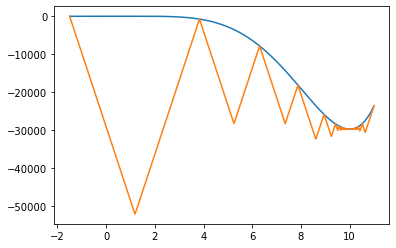

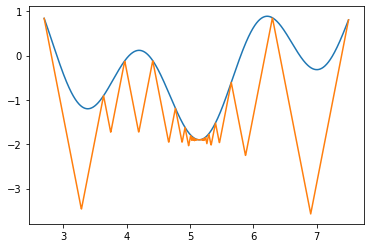

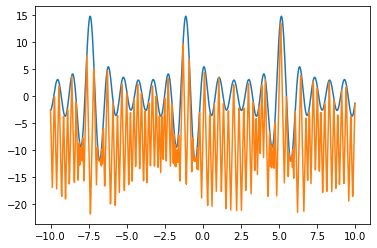

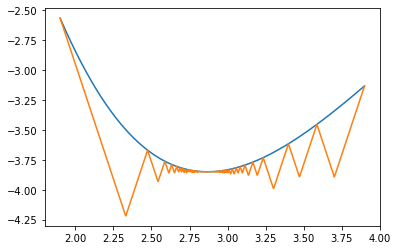

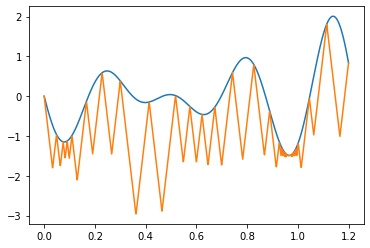

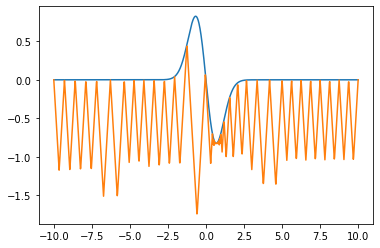

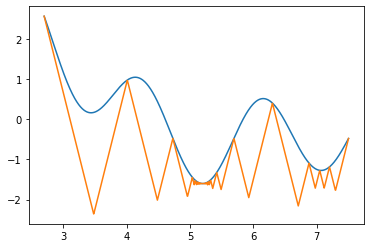

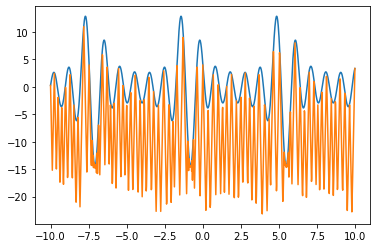

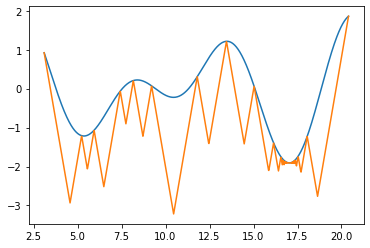

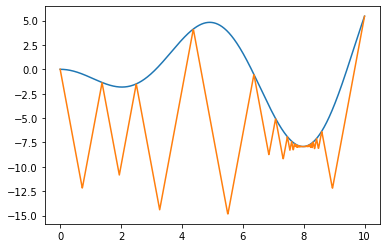

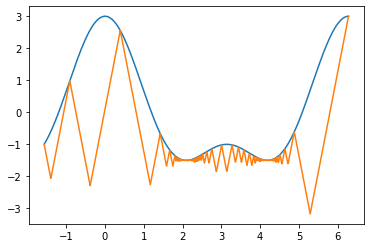

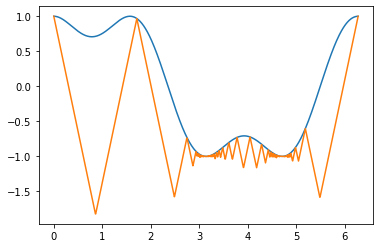

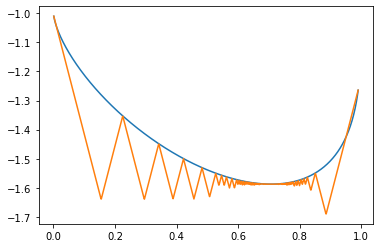

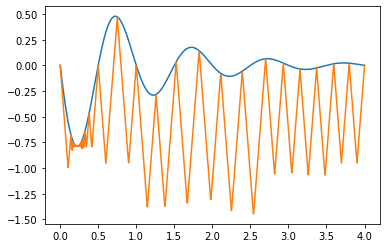

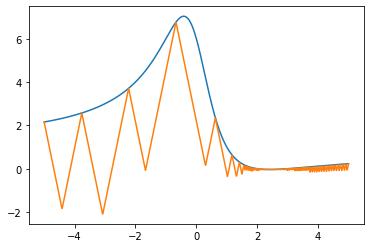

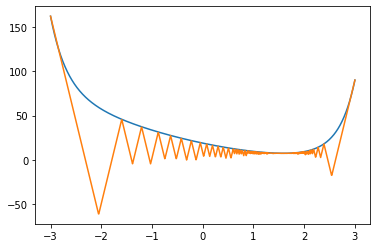

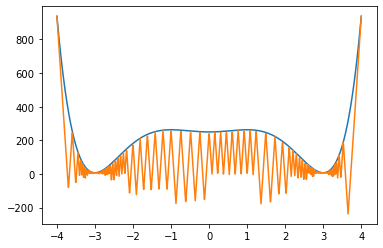

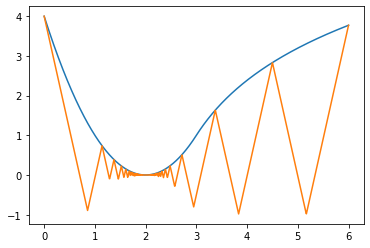

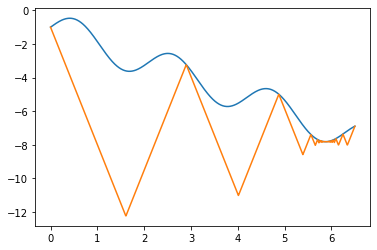

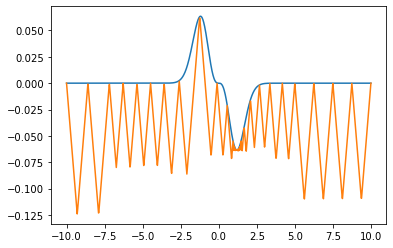

In [79]:
 for index in range(20):
    plt.plot(xarrays[index], yarrays[index])
    plt.plot(xarrays[index], ogarrays[index])
    plt.show()

In [81]:
xarrays, yarrays, ogarrays = [], [], []
for index, func in enumerate(test_functions):
    x_arr = np.linspace(func.interval[0], func.interval[1], 1200)
    y, og = [], []
    tau = 4
    a, b, counter = func.interval[0], func.interval[1], 0
    H = abs(func.f(b) - func.f(a)) / (b - a)
    L = 1 if H == 0 else tau * H
    epsilon = (b - a) * (10 ** -4)
    L_tild = (L + (1 / L) * ((func.f(b) - func.f(a)) / (b - a)) ** 2) / 2
    R = -4 * ((func.f(b) + func.f(a) / 2) - L_tild * ((b - a) / 2))
    dots = [(a, R, H), (b, -float("inf"), -float("inf"))]
    maxval, count, H = i_ng_2(func.f, dots, counter, 0, tau)
    print(index + 1, maxval, count)
    for i in x_arr:
        y.append(func.f(i))
        og.append(F_H_tild(func.f, dots, tau * H, i))
    xarrays.append(x_arr)
    yarrays.append(y)
    ogarrays.append(og)

1 -29763.232874932397 183
2 -1.8995993065986174 132
3 -12.031249354056946 301
4 -3.850450708495435 495
5 -1.4890722734961679 158
6 -0.8242388356683286 125
7 -1.601307445840697 152
8 -14.508006654949622 249
9 -1.9059611060734944 161
10 -7.9167272020119706 211
11 -1.4999999994738769 450
12 -0.9999999994801491 391
13 -1.5874010519341224 477
14 -0.788685387294349 121
15 -0.03553390188110612 832
16 7.515924153629973 646
17 7.000015370941014 615
18 1.6122734536179264e-09 310
19 -7.81567450439853 172
20 -0.06349047137201841 92


1. И - НГ - c L посчитанной через L с чертой L - "geom", в таблице выше форматом "Номер тестовой функции", "Посчитанный минимум", "Количество итераций работы алгоритма".

2. Снизу отображены графики функции и огибающих ломаных:

- параметр остановки алгоритма: $x_t$ - $x_{t-1}$ < $(b - a) \times $$10^{-4}$, где b, a - граничные точки области определения функции, $x_t$ - точка испытания функции на следующем шаге алгоритма, $x_{t-1}$ - точка испытания ближайшая слева на оси абсцисс
- Параметр безопасности $\tau$ = 4

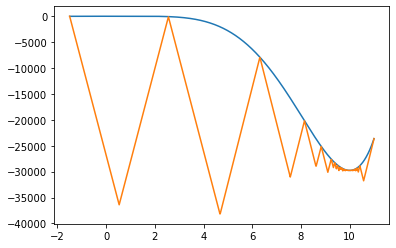

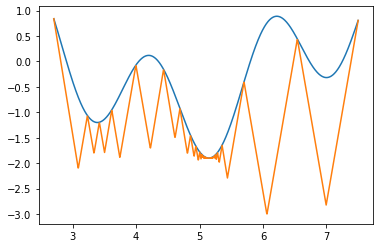

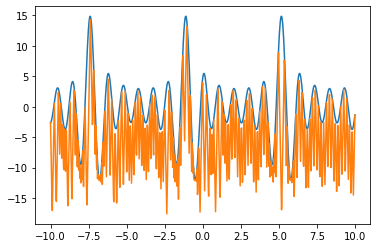

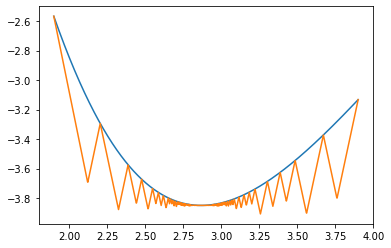

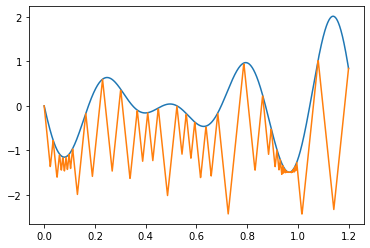

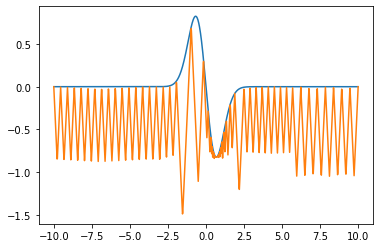

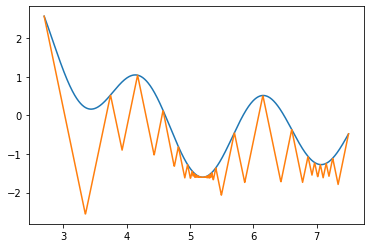

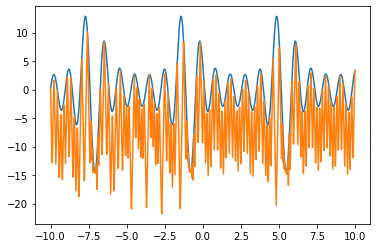

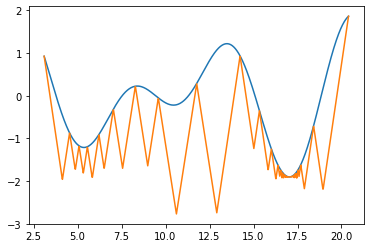

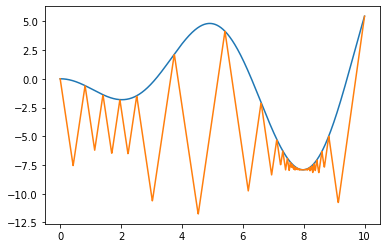

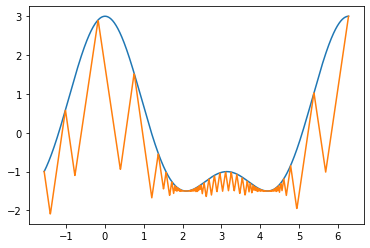

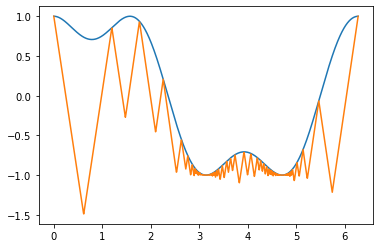

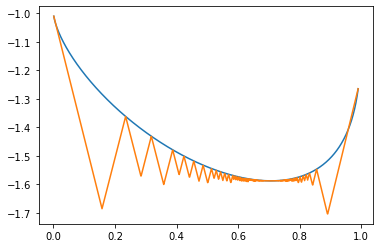

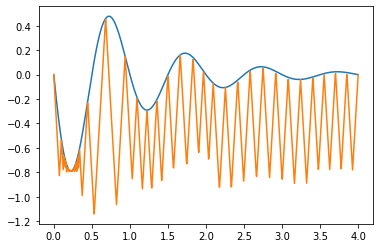

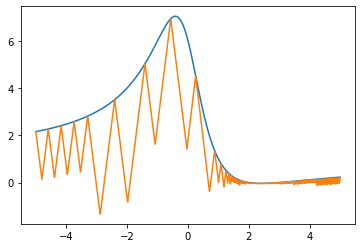

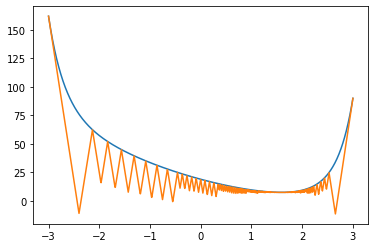

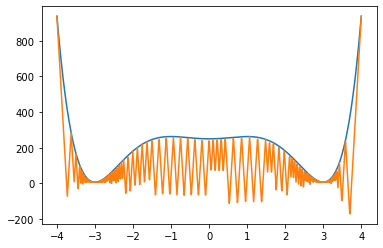

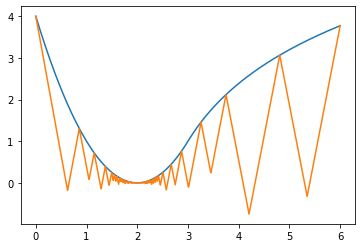

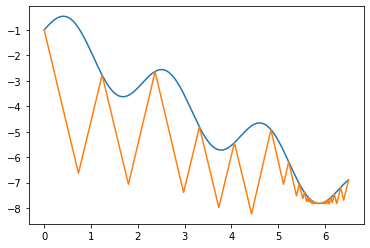

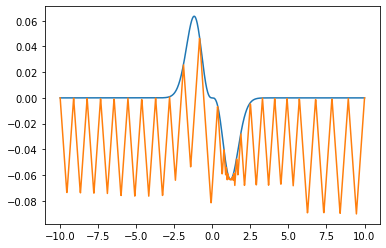

In [82]:
 for index in range(20):
    plt.plot(xarrays[index], yarrays[index])
    plt.plot(xarrays[index], ogarrays[index])
    plt.show()